In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('ETH-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1586,2022-03-14,2518.486328,2604.034424,2505.299316,2590.696045,2590.696045,11244398839
1587,2022-03-15,2590.668945,2662.329590,2515.765869,2620.149658,2620.149658,12861105614
1588,2022-03-16,2620.028564,2781.307129,2610.764404,2772.055664,2772.055664,17915109769
1589,2022-03-17,2771.964111,2826.160645,2751.560791,2814.854492,2814.854492,12685265194


In [3]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

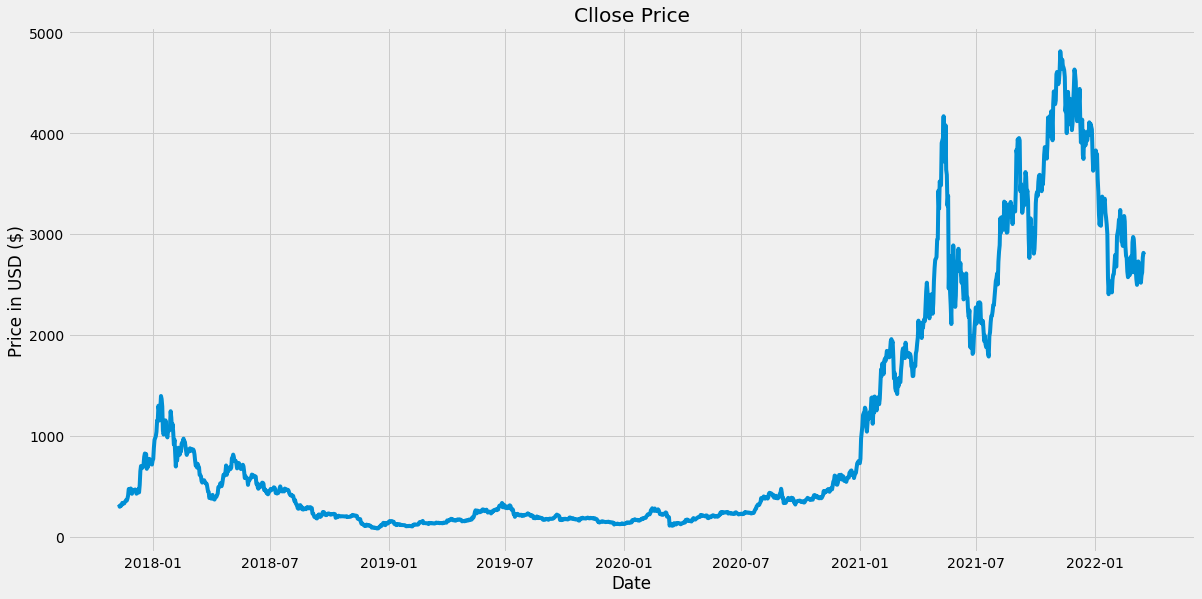

In [5]:
plt.figure(figsize=(18,9))
plt.plot(df.index,df['Close'],label='Close')
plt.title('Cllose Price')
plt.xlabel('Date')
plt.ylabel('Price in USD ($)')
plt.show();

In [6]:
# calculate RSI
delta = df['Close'].diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()
up[up < 0] = 0
down[down > 0] = 0
time_period = 14
AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs(down.rolling(window=time_period).mean())
RS = AVG_Gain / AVG_Loss
RSI = 100.0 - (100.0 / (1.0 + RS))

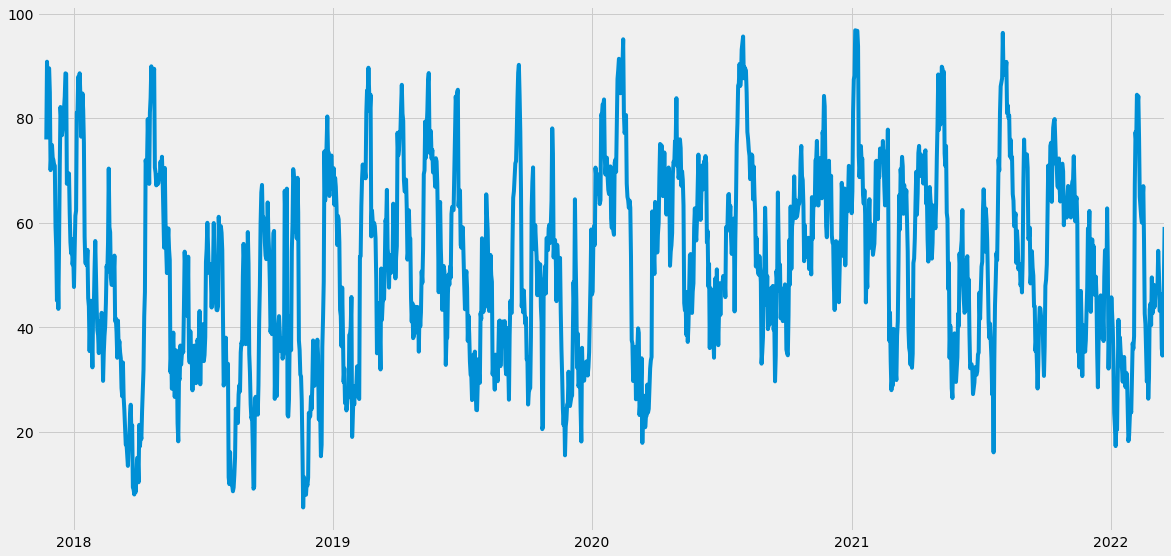

In [7]:
plt.figure(figsize=(18,9))
RSI.plot()
plt.show();

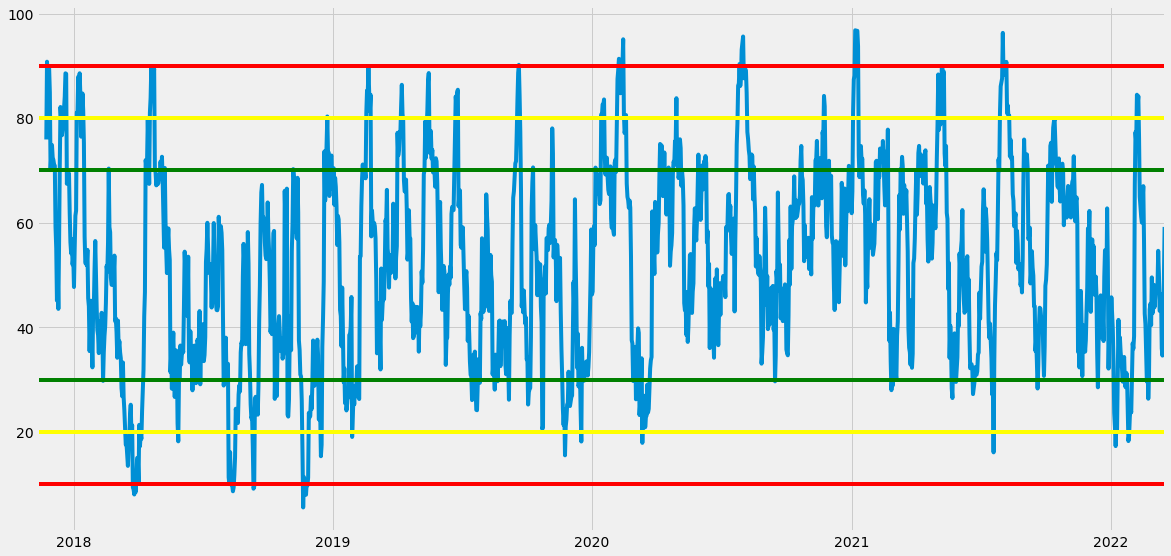

In [9]:
#plot RSi with over bought and over sold
fig,ax = plt.subplots(1,1,figsize=(18,9))
ax0 = RSI.plot(ax=ax)
ax0.axhline(30,color='green')
ax0.axhline(70,color='green')
ax0.axhline(20,color='yellow')
ax0.axhline(80,color='yellow')
ax0.axhline(10,color='red')
ax0.axhline(90,color='red');